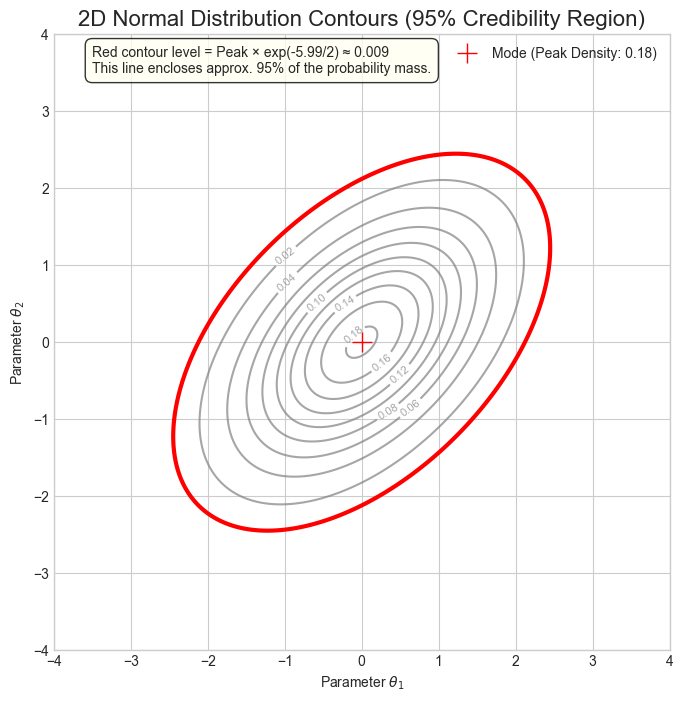

自由度 2 のカイ二乗分布の 95% パーセンタイル値: 5.9915
ピークでの密度: 0.1838
95%の確率を囲む等高線のレベル: 0.0092 (ピークの約 5.0% )


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal, chi2

# 1. 2次元正規分布のパラメータを設定
mean = np.array([0, 0])
covariance = np.array([[1, 0.5],
                       [0.5, 1]])

# 2. 確率密度関数を計算するためのグリッドを作成
x = np.linspace(-4, 4, 500)
y = np.linspace(-4, 4, 500)
X, Y = np.meshgrid(x, y)
pos = np.dstack((X, Y))

# 3. 2次元正規分布のインスタンスを作成し、各点での密度を計算
rv = multivariate_normal(mean, covariance)
Z = rv.pdf(pos)

# --- ここからが解説の核心部分 ---

# 4. ピーク（最頻値）での密度を取得
peak_density = rv.pdf(mean)

# 5. 自由度2のカイ二乗分布の95パーセンタイル値を取得 (理論値: 5.99)
dof = 2  # 次元の数
percentile = 0.95
chi2_val_95 = chi2.ppf(percentile, df=dof)

# 6. 95%の確率を囲む等高線のレベル（高さ）を計算
contour_level_95 = peak_density * np.exp(-chi2_val_95 / 2)


# --- 7. プロットの作成 ---
plt.figure(figsize=(10, 8))
plt.style.use('seaborn-v0_8-whitegrid')

# すべての等高線を描画
contour = plt.contour(X, Y, Z, levels=10, colors='gray', alpha=0.7)
plt.clabel(contour, inline=True, fontsize=8)

# 95%信用区間に対応する等高線を強調して描画
plt.contour(
    X, Y, Z,
    levels=[contour_level_95],
    colors='red',          # 色を赤に
    linewidths=3           # 線を太く
)

# ピーク（最頻値）をプロット
plt.plot(mean[0], mean[1], 'r+', markersize=15, label=f'Mode (Peak Density: {peak_density:.2f})')

# 注釈を追加
plt.text(
    -3.5, 3.5,
    f'Red contour level = Peak × exp(-{chi2_val_95:.2f}/2) ≈ {contour_level_95:.3f}\n'
    f'This line encloses approx. {percentile:.0%} of the probability mass.',
    bbox=dict(boxstyle='round,pad=0.5', fc='ivory', alpha=0.8)
)

# グラフの装飾
plt.title(f'2D Normal Distribution Contours ({percentile:.0%} Credibility Region)', fontsize=16)
plt.xlabel('Parameter $\\theta_1$')
plt.ylabel('Parameter $\\theta_2$')
plt.gca().set_aspect('equal', adjustable='box')
plt.legend()
plt.grid(True)
plt.show()

print(f"自由度 {dof} のカイ二乗分布の {percentile:.0%} パーセンタイル値: {chi2_val_95:.4f}")
print(f"ピークでの密度: {peak_density:.4f}")
print(f"95%の確率を囲む等高線のレベル: {contour_level_95:.4f} (ピークの約 {contour_level_95/peak_density:.1%} )")